In [1]:
#imports, make sure your python environment has all of these
import numpy as np
import matplotlib.pyplot as plt


Jseed    = 4993
r0seed   = 9667


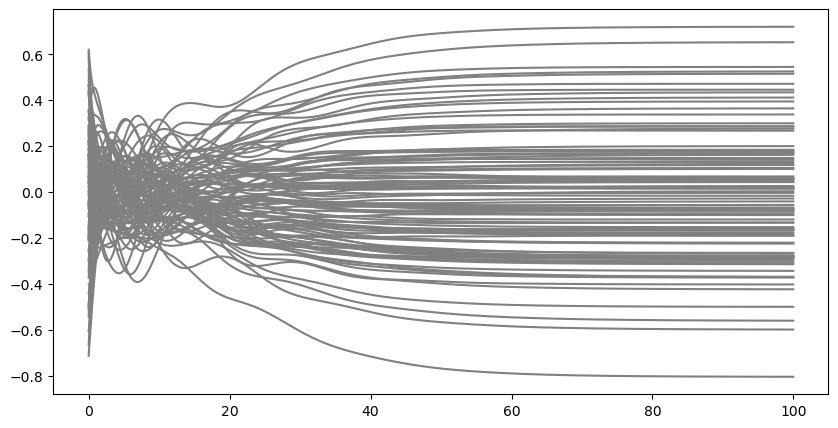

In [148]:
def hdds(N=100,g=1,T=100,dt=0.01,Jseed=None,r0seed=None):
    '''
    Creates model and returns results.
    Args:
        N:      default= 100,   number of units/neurons.
        g:      default= 1,     coupling strength (used to create J).
        T:      default= 100,   length of time to run model for.
        dt:     default= 0.01,  time step length.
        Jseed:  default= None,  seed to be used when creating coupling matrix.
        r0seed: default= None,  seed to be used when definining initial states of the units/neurons.
    
    Returns:
        tuple (t ,r):
        WHERE  
            t is an array of length T/dt, to use when plotting results.  
            r is an array of shape (N,T/dt) containing the time-domain results for each unit/neuron.
    
    # Example use:
    time, results = hdd()  
    plt.plot(t, r[0,:])  
    plt.plot(t, r[1,:]) #Plots only results for unit 0 and 1, but could be any  
    '''
    np.random.seed()
    if Jseed is None:
        Jseed = np.random.randint(0,10000)
    if r0seed is None:
        r0seed = np.random.randint(0,10000)
    #default parameters
    stdevInitial = 0.3
    
    
    nSteps = int(np.ceil(T/dt))
    r = np.zeros((N,nSteps)) #preallocating results array
    
    np.random.seed(Jseed)
    J = np.random.normal(loc=0, scale=g/np.sqrt(N), size=(N,N)) #populate J 
    J = J - np.diag(np.diag(J)) #zero diagonals
    
    np.random.seed(r0seed)
    r[:, 0] = np.random.normal(0,stdevInitial,N)
    t = np.zeros(nSteps)
    
    #iterate system
    for n in range(0,nSteps-1):
        
        r[:,n+1] = r[:, n] - (r[:, n])*dt + np.matmul(J, np.tanh(r[:, n]))*dt
        t[n+1] = n*dt
    
    print()
    print('Jseed    =', Jseed)
    print('r0seed   =', r0seed)
    return t, r

N = 100
t, r = hdds(N=N, g=1.1, T=100, dt=0.01)# Jseed=8342, r0seed=4952)

plt.figure(figsize=(10,5))
for i in range(N):
    plt.plot(t,r[i,:],color='grey')